# Remote Sensing Report Assignment

This notebook has instructions and starter code for the assessment of the remote sensing part of the course. 

This assessment is worth 15% of the total ENVS258 module mark.

**Due date:** 5th of March 2020 14:00 (electronic submission only!)

## General background

*The following is fiction. Play along.*

A national government passed new legislation that mandates the national agriculture agency of this country to monitor the environment at a national level. 
The new legislation focusses on obtaining quantitative data to prove its commitment with the [Kyoto Protocol](https://en.wikipedia.org/wiki/Kyoto_Protocol). 
To easily compare results across nations, the United Nations has suggested a code-of-practice workflow using satellite remote sensing data. 
Due to lack of in-house expertise and budget cuts in the last few years, the agriculture agency outsources this task to an environmental consultancy company, which will carry out a preliminary analysis using remote sensing imagery. 
**You are the remote sensing expert in this consultancy company.**

Remote sensing can be used to monitor land cover change (*you vaguely recall hearing about this in ENVS258 at the University of Liverpool; luckily you still have your class notes and Jupyter notebooks from the practicals*). 
In particular, optical multispectral imagery can be used to compute indexes (like [NDVI](https://en.wikipedia.org/wiki/Normalized_Difference_Vegetation_Index) and [Normalized Burn Ratio](https://www.earthdatascience.org/courses/earth-analytics-python/multispectral-remote-sensing-modis/calculate-dNBR-Landsat-8/)) and [composites](https://earthobservatory.nasa.gov/features/FalseColor/page6.php) (combinations of different bands to form "false" colors).
Multispectral images from the Landsat missions are available for free download and can provide an indispensible tool for a nascent consultancy company.


## Instructions

You will choose an area/event of interest, download and analyze Landsat multispectral imagery for the area/event, write a scientific report about your results and conclusions. 
Your main objective is to investigate the environmental impact of human action or natural phenomena. 
For example: deforestation, agricultural land usage, flooding, glacier ice loss, forest fires, landslides.
Use the tools learned in class to evaluate this impact.
**Aim to be as quantitative as possible** (beyond looking at an image, calculate different indices, means, histograms, rates of change, standard deviations).

### Guidelines

* The report can have a **maximum of 4 pages** with 2cm margins on all sides and Arial 11 pt font. This includes text, figures, captions, and references.
* Your report can be less than 4 pages. *If* you can achive the same level of quality with less text, there will be no problem.
* It is strongly recommended to submit your report in PDF format (not Word).
* Please double-check your submission. Bad formatting will be penalized.
* All images must have captions.
* Figures must have labels on axis and colorbars.
* Images from articles and books must have proper citations.
* Do not use copywrited images that do not allow reuse. Figures from papers are fine with citations but random images from the internet are not. See below to learn how to search for images that can be reused.

### Format

Your report should contain **all** of the following sections:

1. **Title and author name**
2. **Abstract**: An abstract of approximately 4-6 lines that summarizes this report. Briefly state the problem, main findings, interpretation, and conclusions. Write this last.
3. **Introduction**: An introduction which informs in more detail about the problem to solve, and the approach to take. State the motivation for this study, results from previous studies, and your main goals.
4. **Data**: A section presenting which data was used in the report (describe the data type, satellite, where you downloaded it from, how you selected the data, etc).
4. **Methodology**: What type of analysis was performed on that data. We have covered several in class. You can find other indices, composites, and statistics online and in textbooks.
5. **Results**: A section which presents and describes the results without any interpretation. Just a plain description of the results (e.g., In Figure 3 we present the coherence values obtained using summer acquisitions. The values of coherence spanned the range from 0.4 to 0.9, with 80% of the pixels with values above 0.5).
6. **Discussion**: A section where the results are discussed and interpreted based on your knowledge of the problem and background information (what you researched for your introduction). Use common sense, literature references, and relate key information from lectures and practicals to your results. Discuss the possible sources of error and uncertainty in your estimates.
7. **Conclusions**: A short section where all information analysis, results, and discussion come together to formalize newly obtained knowledge.
8. **References**: Use the [ACS style](https://en.wikipedia.org/wiki/ACS_style).

### Tips

General:

* **READ THE INSTRUCTIONS CAREFULLY**.
* Clink on the links in this notebook! They are meant to help.
* Use the code and instructions from the practicals.
* Read reference material and search the scientific literature for your study area.
* Label axis on plots and images (names and units), including colorbars.
* Use appropriate resolution for your figures. They must be legible in the report.

Programming:

* Use meaningful variables names (`temperature` instead of `x`).
* If you get an error, **read the error message** to find out what went wrong.
* If your results are wrong, **don't change the code** until you know why this happened and what you can do to fix it.
* Google search is your best friend. Answers from StackOverflow are generally good sources of information.
* **Backup your notebooks, data, and report!** Do it every 15-30 minutes. Save often.

Seaching for images labeled for reuse with Google:

* Search for a topic ("landsat" for example) and click on "Images".
* Click on "Tools".
* Click on "Usage Rights".
* Select "Labeled for Reuse".
* These images should be safe to use (they likely have [CreativeCommons licenses](https://creativecommons.org/)).

> ![Example of Google image search labeled for reuse.](https://github.com/compgeolab/envs258-practicals/raw/7b26724eec25cc519c2e676902a24332c88d0830/report/google-image-search.jpg)

## Resources 

These are links that will help you find inspiration and interesting projects:

* NASA Earth Observatory: https://earthobservatory.nasa.gov
* NASA WorldView (see the Events tab): https://worldview.earthdata.nasa.gov
* Composite combinations to try: https://earthobservatory.nasa.gov/features/FalseColor/page6.php
* Earth Data Sciences courses: https://www.earthdatascience.org  (note that the code examples use their custom library [earthpy](http://earthpy.org/) which you won't have installed)

To download Landsat 7 and 8 data:

* USGS Earth Explorer: https://earthexplorer.usgs.gov
    * You will have to create a free account.
    * Datasets (scenes) can be large (~800Mb each).
    * It will take time to download so plan ahead!
* Instructions for using Earth Explorer: https://www.earthdatascience.org/courses/earth-analytics/multispectral-remote-sensing-modis/get-data-earth-explorer/
    * You don't have to add images to your cart. 
    * Instead, click on the download button for individual scenes to download them directly.

## Data loading and analysis example

The following code loads a multispectral scene from Landsat 8 using [scikit-image](http://scikit-image.org). This is similar to what we did in previous practicals. The main difference is that we're loading the actual data downloaded from the USGS, not a prepared example for class.

As always, start by importing what we need.

In [1]:
import matplotlib.pyplot as plt
import skimage.io
import skimage.exposure
import numpy as np

Use scikit-image to read the image for band 5 from the TIF file. In this example, I unpacked the archive with the scene into a folder called `data`. The `/` indicate the *path* to the data file: in the `data` folder, in the `LC08_L1TP_062047_20181208_20181226_01_T1` folder, there is the file `LC08_L1TP_062047_20181208_20181226_01_T1_B5.TIF`. Change this to your particular needs.

In [2]:
band5 = skimage.io.imread("data/LC08_L1TP_062047_20181208_20181226_01_T1/LC08_L1TP_062047_20181208_20181226_01_T1_B5.TIF")

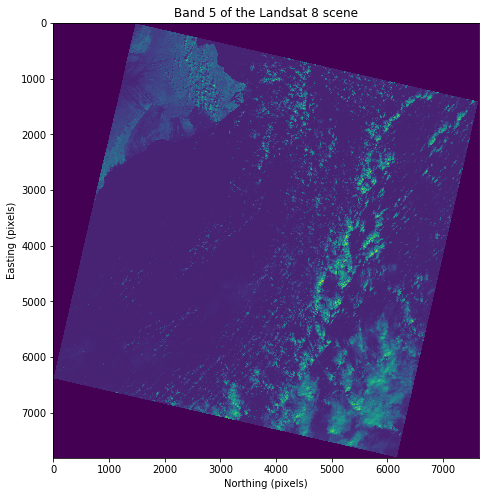

In [3]:
plt.figure(figsize=(9, 8))
plt.title("Band 5 of the Landsat 8 scene")
plt.imshow(band5)
plt.xlabel("Northing (pixels)")
plt.ylabel("Easting (pixels)")
# To save the figure to a PNG or PDF. Sppecify the dpi argument to increase resolution.
plt.savefig("landsat8-band5.png")
plt.show()

We can load other bands and make a composite. We will create the composite in the same way we did in practical 2.

In [4]:
band4 = skimage.io.imread("data/LC08_L1TP_062047_20181208_20181226_01_T1/LC08_L1TP_062047_20181208_20181226_01_T1_B4.TIF")
band3 = skimage.io.imread("data/LC08_L1TP_062047_20181208_20181226_01_T1/LC08_L1TP_062047_20181208_20181226_01_T1_B3.TIF")

In [5]:
# Number of elements in each dimension of the array
height, width = band5.shape

In [6]:
# Create an empty array with 3 bands of data type unsigned integer of 16 bits 
composite = np.empty((height, width, 3), dtype="uint16")
composite[:, :, 0] = band5
composite[:, :, 1] = band4
composite[:, :, 2] = band3
# Rescale the composite to 8bit unsigned integers so that matplotlib can plot it
composite = skimage.exposure.rescale_intensity(composite, out_range="uint8")

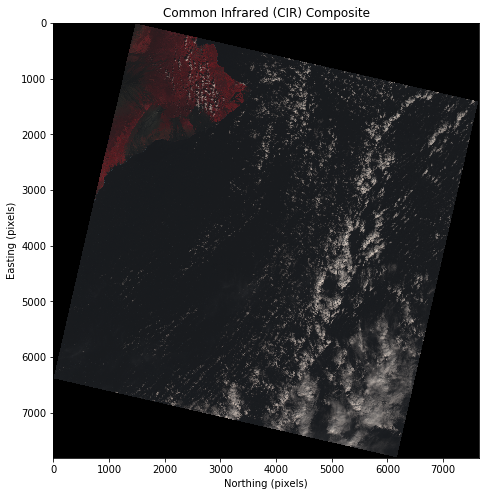

In [7]:
plt.figure(figsize=(9, 8))
plt.title("Common Infrared (CIR) Composite")
plt.imshow(composite)
plt.xlabel("Northing (pixels)")
plt.ylabel("Easting (pixels)")
plt.show()

The image is large and most of it is the Pacific ocean. We can crop the image to get rid of the black edges and oceanic areas. To crop the image, use the same code that we used to *slice* a numpy array.

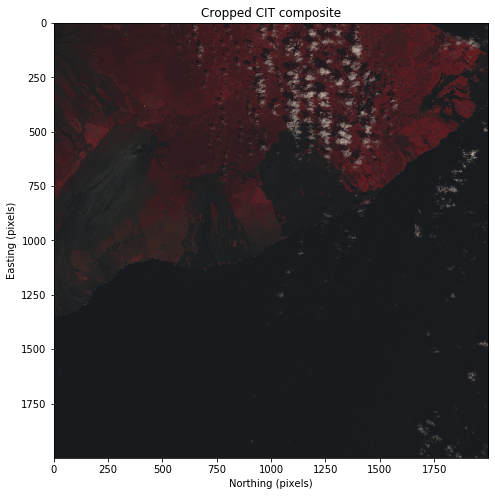

In [8]:
# Select only a range of rows and columns but all 3 bands
cropped_composite = composite[1000:3000, 1500:3500, :]

plt.figure(figsize=(9, 8))
plt.title("Cropped CIT composite")
plt.imshow(cropped_composite)
plt.xlabel("Northing (pixels)")
plt.ylabel("Easting (pixels)")
plt.show()

To rescale the intensity of the composite, we must also preserve the 8 bit scale for matplotlib. To do this, always specify `out_range="uint8"` to `skimage.exposure.rescale_intensity` (see the solution to practical 2).

## Your own analysis

Now you have some of the basic tools to do your own analysis. Consult the practicals to remind yourself how to do things in Python. Search the internet, textbooks, and scientific articles for examples of different computations/indices/composites that you can create.

Examples:

* Track the average NDVI (or other index) through time for an area of interest. You'll have to download scenes for the same place taken at different times. 
* Measure changing ice coverage/extent for a glacier over time. There are composites that highlight ice. 
* Calculate the area pecentage (or absolute area) affected by a wild fire.
* Track the total area of new lava flows from recent volcanic eruptions.

You can start your own notebook or continue on this one. Remember to use Markdown cells to take notes so that you remember what you did when you're writing your report.